In [2]:
import pandas as pd
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [3]:

# Load CSV file into a DataFrame
df_new = pd.read_csv("datap/clinical_result_labeled.csv")

# Display first 5 rows
print(df_new.head())


                               Name Gene(s) Protein change  \
0  NM_001110792.2(MECP2):c.*7856A>C   MECP2            NaN   
1  NM_001110792.2(MECP2):c.*7748C>T   MECP2            NaN   
2  NM_001110792.2(MECP2):c.*5839C>T   MECP2            NaN   
3  NM_001110792.2(MECP2):c.*5348T>C   MECP2            NaN   
4  NM_001110792.2(MECP2):c.*4576A>C   MECP2            NaN   

                 Condition(s)     Accession GRCh37Chromosome  GRCh37Location  \
0  not provided|Rett syndrome  VCV000143283                X       153287962   
1               Rett syndrome  VCV000143282                X       153288070   
2               Rett syndrome  VCV000143280                X       153289979   
3  not provided|Rett syndrome  VCV000143275                X       153290470   
4               Rett syndrome  VCV000143271                X       153291242   

  GRCh38Chromosome  GRCh38Location  VariationID  ...   Sequence_ID   position  \
0                X       154022511       143283  ...  NC_000023.1

In [4]:

# Count the number of transitions and transversions
transition_count = df_new[df_new['Mutation_Type'] == 'Transition'].shape[0]
transversion_count = df_new[df_new['Mutation_Type'] == 'Transversion'].shape[0]
unknown_count = df_new[df_new['Mutation_Type'] == 'Unknown'].shape[0]

# Display the counts
print(f"✅ Number of Transitions: {transition_count}")
print(f"✅ Number of Transversions: {transversion_count}")
print(f"✅ Number of Unknown Mutation Types: {unknown_count}")


✅ Number of Transitions: 450
✅ Number of Transversions: 352
✅ Number of Unknown Mutation Types: 0


✅ The most frequent base pair mutation is: G>A
✅ It occurs 222 times.
BP_Mutation
G>A    222
C>T    130
G>C    108
T>C     71
G>T     64
C>G     56
C>A     42
T>A     31
T>G     28
A>G     27
A>C     15
A>T      8
Name: count, dtype: int64


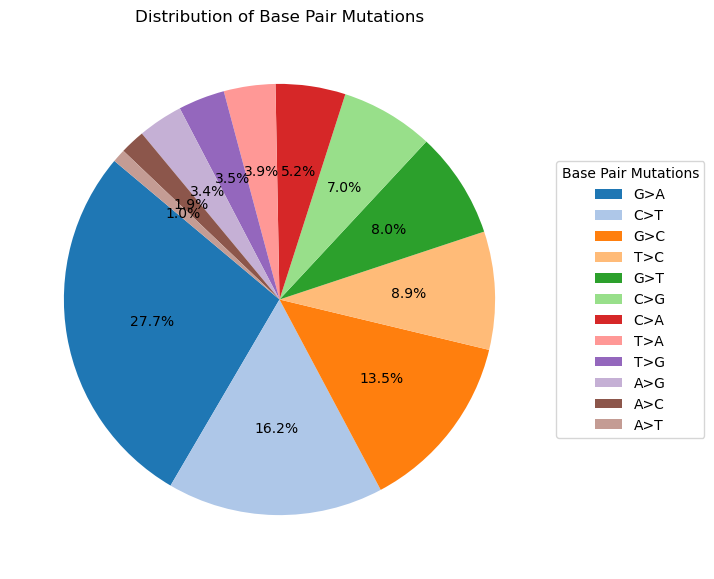

<Figure size 640x480 with 0 Axes>

In [5]:

# Create a new column that combines Deleted and Inserted Sequences
df_new['BP_Mutation'] = df_new['Deleted_Sequence'] + '>' + df_new['Inserted_Sequence']

# Count the frequency of each base pair mutation
bp_mutation_counts = df_new['BP_Mutation'].value_counts()

# Get the highest base pair mutation
most_frequent_bp_mutation = bp_mutation_counts.idxmax()
most_frequent_bp_mutation_count = bp_mutation_counts.max()

print(f"✅ The most frequent base pair mutation is: {most_frequent_bp_mutation}")
print(f"✅ It occurs {most_frequent_bp_mutation_count} times.")

# Display the full count table for additional analysis
print(bp_mutation_counts)

# Generate a unique color palette for each mutation type
colors = sns.color_palette('tab20', n_colors=len(bp_mutation_counts))

# Pie chart representation with unique colors and a legend
plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(bp_mutation_counts, autopct='%1.1f%%', startangle=140, colors=colors)

# Adding a legend
plt.legend(wedges, bp_mutation_counts.index, title="Base Pair Mutations", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Base Pair Mutations')
plt.show()

plt.savefig('plots/Distribution_of_Base_Pair_Mutations.png')

In [6]:
print(df_new.head())

                               Name Gene(s) Protein change  \
0  NM_001110792.2(MECP2):c.*7856A>C   MECP2            NaN   
1  NM_001110792.2(MECP2):c.*7748C>T   MECP2            NaN   
2  NM_001110792.2(MECP2):c.*5839C>T   MECP2            NaN   
3  NM_001110792.2(MECP2):c.*5348T>C   MECP2            NaN   
4  NM_001110792.2(MECP2):c.*4576A>C   MECP2            NaN   

                 Condition(s)     Accession GRCh37Chromosome  GRCh37Location  \
0  not provided|Rett syndrome  VCV000143283                X       153287962   
1               Rett syndrome  VCV000143282                X       153288070   
2               Rett syndrome  VCV000143280                X       153289979   
3  not provided|Rett syndrome  VCV000143275                X       153290470   
4               Rett syndrome  VCV000143271                X       153291242   

  GRCh38Chromosome  GRCh38Location  VariationID  ...   Sequence_ID   position  \
0                X       154022511       143283  ...  NC_000023.1

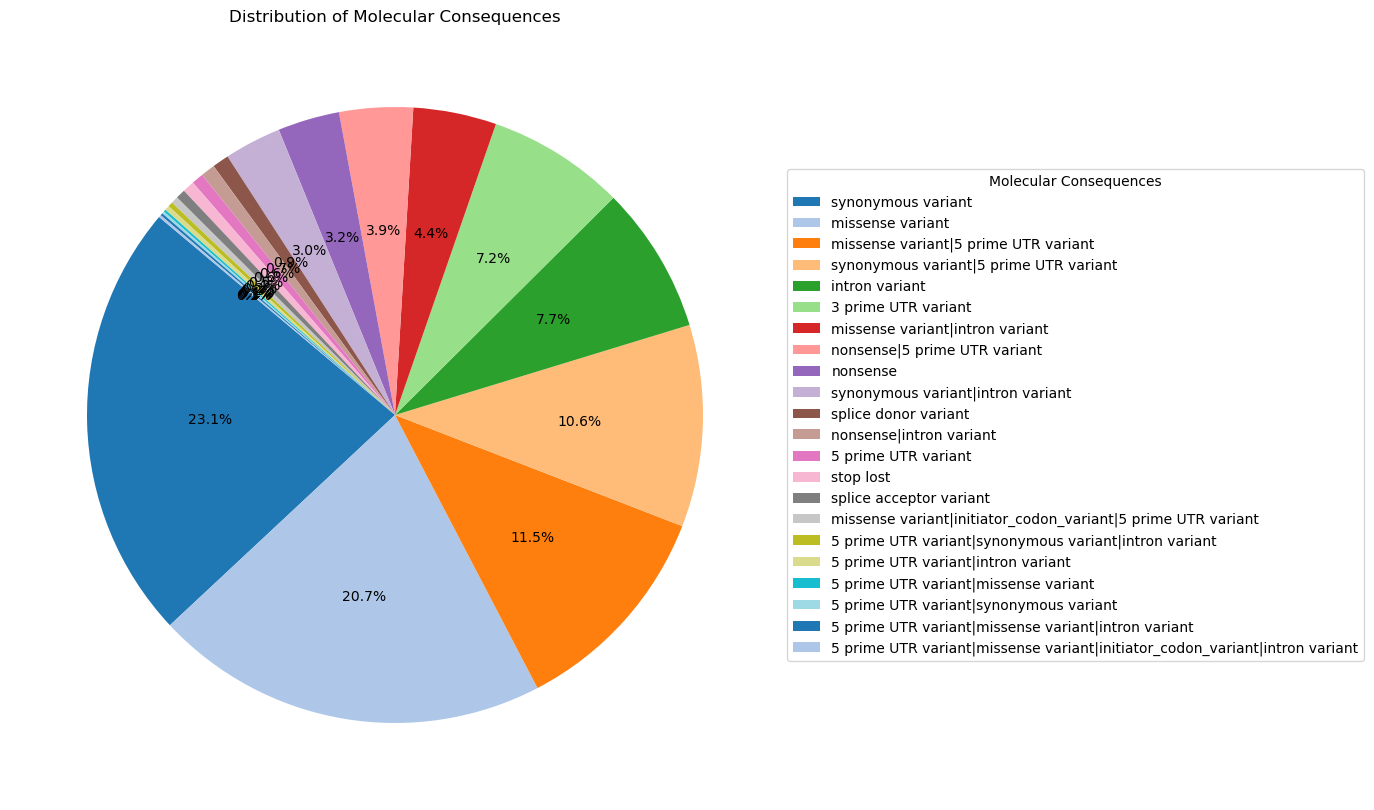

<Figure size 640x480 with 0 Axes>

In [7]:

# Count the frequency of each molecular consequence
molecular_consequence_counts = df_new['Molecular consequence'].value_counts()

# Generate a unique color palette for each consequence type
colors = sns.color_palette('tab20', n_colors=len(molecular_consequence_counts))

# Pie chart representation with unique colors and a legend
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(molecular_consequence_counts, autopct='%1.1f%%', startangle=140, colors=colors)

# Adding a legend
plt.legend(wedges, molecular_consequence_counts.index, title="Molecular Consequences", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Molecular Consequences')
plt.show()

plt.savefig('plots/Distribution_of_Molecular_Consequences.png')


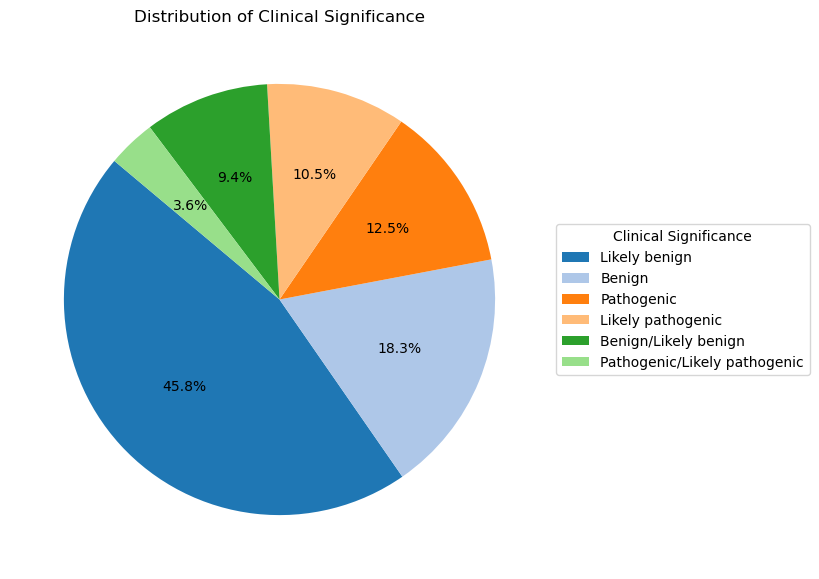

<Figure size 640x480 with 0 Axes>

In [8]:


# Count the frequency of each clinical significance
clinical_significance_counts = df_new['Germline classification'].value_counts()

# Generate a unique color palette for each significance type
colors = sns.color_palette('tab20', n_colors=len(clinical_significance_counts))

# Pie chart representation with unique colors and a legend
plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(clinical_significance_counts, autopct='%1.1f%%', startangle=140, colors=colors)

# Adding a legend
plt.legend(wedges, clinical_significance_counts.index, title="Clinical Significance", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Clinical Significance')
plt.show()


plt.savefig('plots/Distribution_of_Clinical_Significance.png')

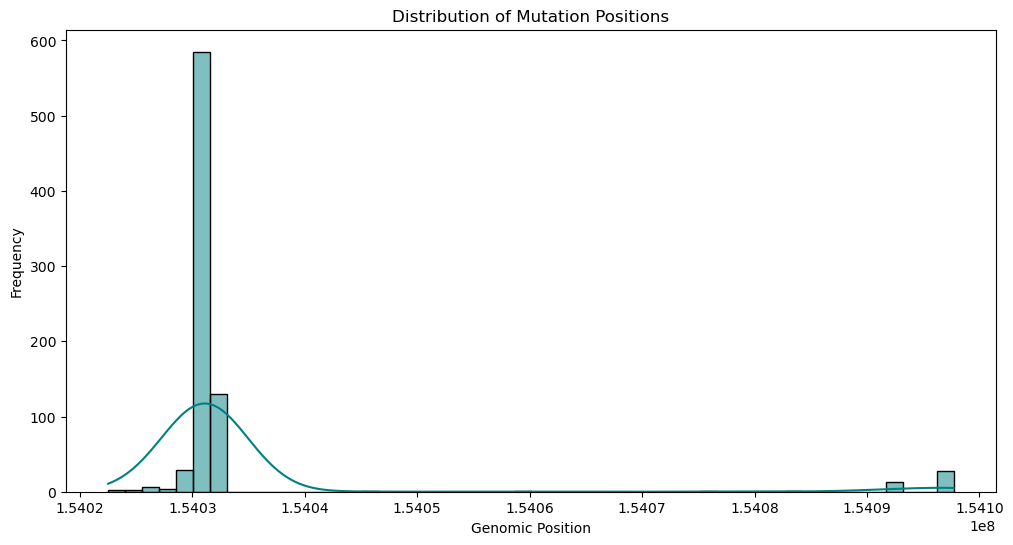

<Figure size 640x480 with 0 Axes>

In [9]:


# Distribution of mutation positions
plt.figure(figsize=(12, 6))
sns.histplot(df_new['position'].dropna(), bins=50, kde=True, color='teal')
plt.title('Distribution of Mutation Positions')
plt.xlabel('Genomic Position')
plt.ylabel('Frequency')
plt.show()
plt.savefig('plots/Distribution_of_Mutation_Positon.png')





Frequency of Base Pair Mutations:
BP_Mutation
G>A    222
C>T    130
G>C    108
T>C     71
G>T     64
C>G     56
C>A     42
T>A     31
T>G     28
A>G     27
A>C     15
A>T      8
Name: count, dtype: int64

Frequency of Molecular Consequences:
Molecular consequence
synonymous variant                                                             185
missense variant                                                               166
missense variant|5 prime UTR variant                                            92
synonymous variant|5 prime UTR variant                                          85
intron variant                                                                  62
3 prime UTR variant                                                             58
missense variant|intron variant                                                 35
nonsense|5 prime UTR variant                                                    31
nonsense                                                                

C:\Users\sravy\AppData\Local\Temp\ipykernel_28644\696713296.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bp_mutation_counts.index, y=bp_mutation_counts.values, palette='muted')


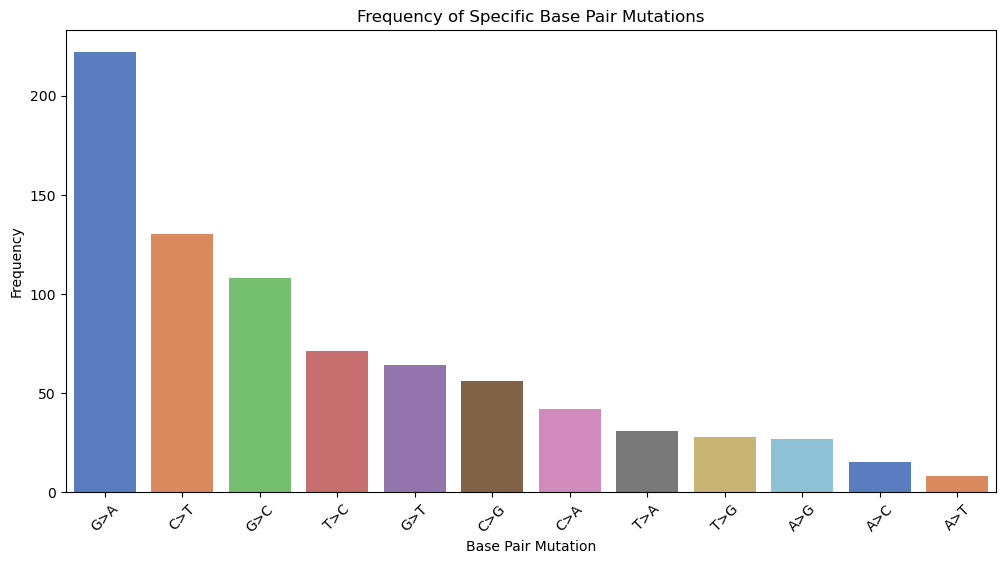

C:\Users\sravy\AppData\Local\Temp\ipykernel_28644\696713296.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=molecular_consequence_counts.index, y=molecular_consequence_counts.values, palette='pastel')


<Figure size 640x480 with 0 Axes>

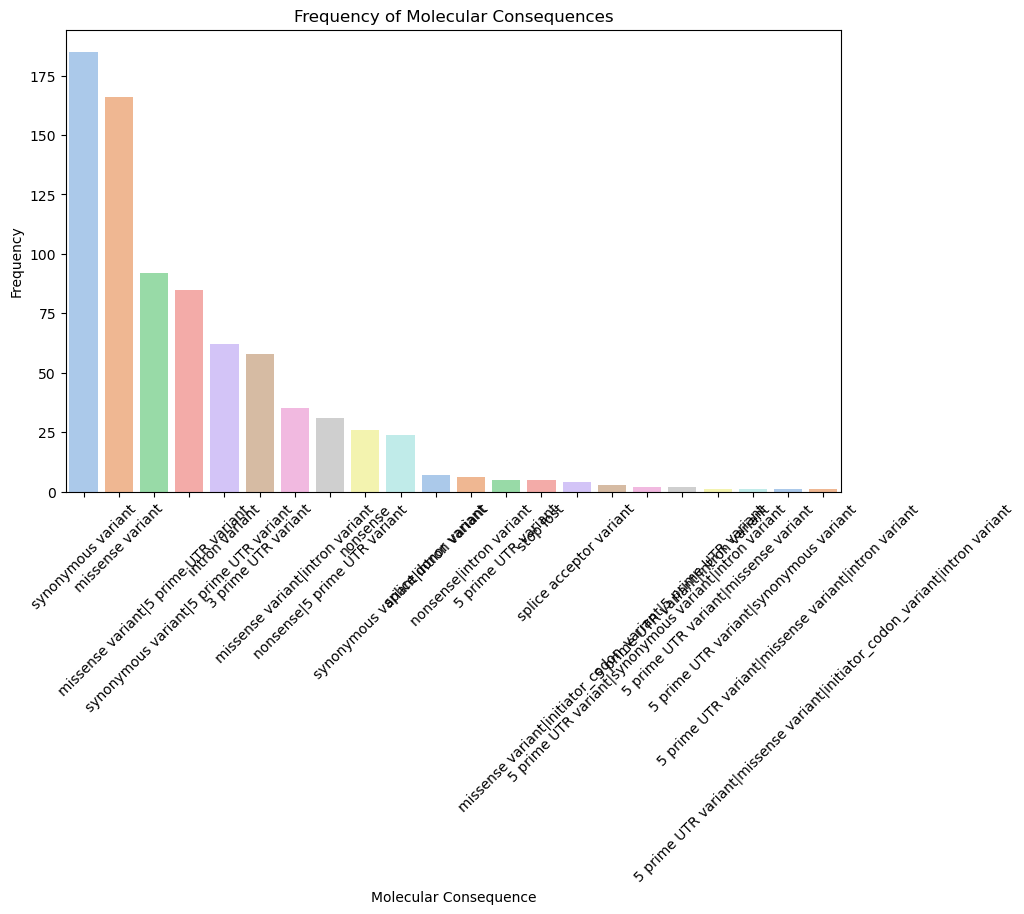

C:\Users\sravy\AppData\Local\Temp\ipykernel_28644\696713296.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deleted_bp_counts.index, y=deleted_bp_counts.values, palette='dark')


<Figure size 640x480 with 0 Axes>

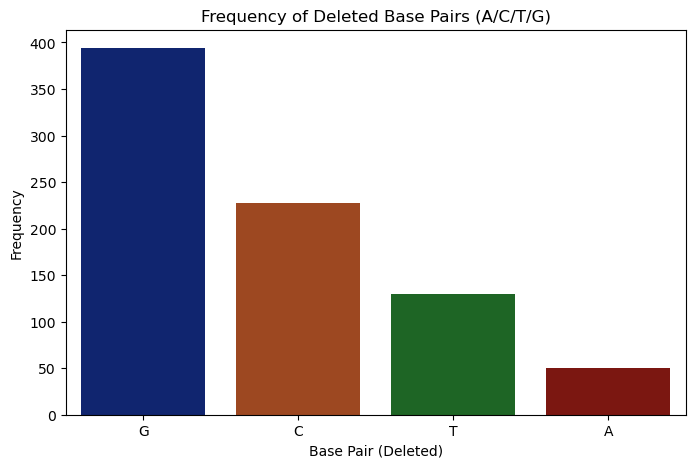

C:\Users\sravy\AppData\Local\Temp\ipykernel_28644\696713296.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inserted_bp_counts.index, y=inserted_bp_counts.values, palette='dark')


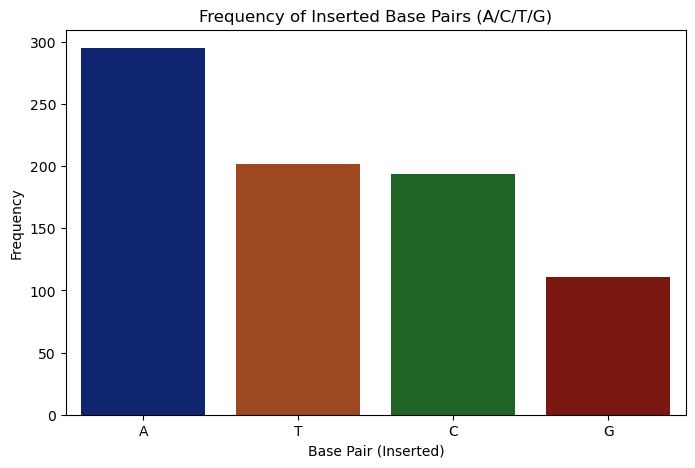

In [10]:


# Count the frequency of each base pair mutation
bp_mutation_counts = df_new['BP_Mutation'].value_counts()

print("Frequency of Base Pair Mutations:")
print(bp_mutation_counts)

# Count the frequency of each molecular consequence
molecular_consequence_counts = df_new['Molecular consequence'].value_counts()

print("\nFrequency of Molecular Consequences:")
print(molecular_consequence_counts)

# Count the frequency of each base pair (Deleted Sequence)
deleted_bp_counts = df_new['Deleted_Sequence'].value_counts()

print("\nFrequency of Deleted Base Pairs (A/C/T/G):")
print(deleted_bp_counts)

# Count the frequency of each base pair (Inserted Sequence)
inserted_bp_counts = df_new['Inserted_Sequence'].value_counts()

print("\nFrequency of Inserted Base Pairs (A/C/T/G):")
print(inserted_bp_counts)

# Plotting the frequency of base pair mutations
plt.figure(figsize=(12, 6))
sns.barplot(x=bp_mutation_counts.index, y=bp_mutation_counts.values, palette='muted')
plt.title('Frequency of Specific Base Pair Mutations')
plt.xlabel('Base Pair Mutation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
plt.savefig('plots/Frequency_of_Specific_Base_Pair_Mutations.png')
# Plotting the frequency of molecular consequences
plt.figure(figsize=(10, 6))
sns.barplot(x=molecular_consequence_counts.index, y=molecular_consequence_counts.values, palette='pastel')
plt.title('Frequency of Molecular Consequences')
plt.xlabel('Molecular Consequence')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
plt.savefig('plots/Frequency_of_Specific_Base_Pair_Mutations.png')
# Plotting the frequency of base pair deletions
plt.figure(figsize=(8, 5))
sns.barplot(x=deleted_bp_counts.index, y=deleted_bp_counts.values, palette='dark')
plt.title('Frequency of Deleted Base Pairs (A/C/T/G)')
plt.xlabel('Base Pair (Deleted)')
plt.ylabel('Frequency')
plt.show()

# Plotting the frequency of base pair insertions
plt.figure(figsize=(8, 5))
sns.barplot(x=inserted_bp_counts.index, y=inserted_bp_counts.values, palette='dark')
plt.title('Frequency of Inserted Base Pairs (A/C/T/G)')
plt.xlabel('Base Pair (Inserted)')
plt.ylabel('Frequency')
plt.show()


Correlation Matrix:
                         position  Molecular consequence  \
position                 1.000000              -0.111991   
Molecular consequence   -0.111991               1.000000   
Germline classification  0.078850               0.075986   
Mutation_Type            0.022734              -0.091413   

                         Germline classification  Mutation_Type  
position                                0.078850       0.022734  
Molecular consequence                   0.075986      -0.091413  
Germline classification                 1.000000       0.157625  
Mutation_Type                           0.157625       1.000000  


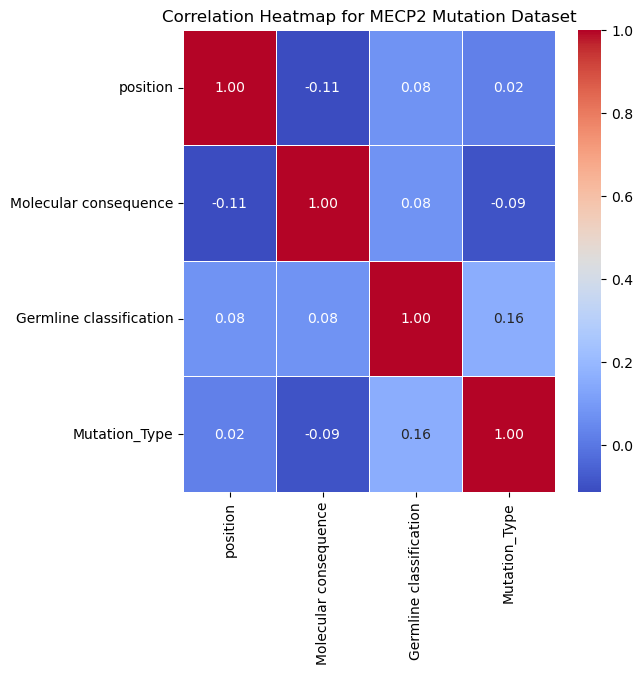

In [16]:


# Convert categorical features to numerical format for correlation analysis
df_correlation = df_new.copy()

# Encoding categorical variables for correlation analysis
df_correlation['Molecular consequence'] = df_correlation['Molecular consequence'].astype('category').cat.codes
df_correlation['Germline classification'] = df_correlation['Germline classification'].astype('category').cat.codes
df_correlation['Mutation_Type'] = df_correlation['Mutation_Type'].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = df_correlation[['position', 'Molecular consequence', 'Germline classification', 'Mutation_Type']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for MECP2 Mutation Dataset')
plt.show()


In [12]:


# Create a contingency table for Mutation_Type and Clinical Significance
contingency_table = pd.crosstab(df_new['Mutation_Type'], df_new['Germline classification'])

print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("✅ There is a statistically significant relationship between mutation type and clinical significance.")
else:
    print("❌ No statistically significant relationship found between mutation type and clinical significance.")


Contingency Table:
Germline classification  Benign  Benign/Likely benign  Likely benign  \
Mutation_Type                                                          
Transition                   88                    61            218   
Transversion                 59                    14            149   

Germline classification  Likely pathogenic  Pathogenic  \
Mutation_Type                                            
Transition                              25          44   
Transversion                            59          56   

Germline classification  Pathogenic/Likely pathogenic  
Mutation_Type                                          
Transition                                         14  
Transversion                                       15  

Chi-Square Test Results:
Chi-Square Statistic: 52.19
Degrees of Freedom: 5
P-Value: 0.0000
✅ There is a statistically significant relationship between mutation type and clinical significance.


In [13]:


# Encode categorical variables for numerical ANOVA analysis
df_anova = df_new.copy()
df_anova['Germline classification'] = df_anova['Germline classification'].astype('category').cat.codes
df_anova['Molecular consequence'] = df_anova['Molecular consequence'].astype('category').cat.codes
df_anova['Mutation_Type'] = df_anova['Mutation_Type'].astype('category').cat.codes

# Perform ANOVA analysis between Mutation_Type and Germline Classification
anova_results = stats.f_oneway(
    df_anova[df_anova['Mutation_Type'] == 0]['Germline classification'],
    df_anova[df_anova['Mutation_Type'] == 1]['Germline classification'],
    df_anova[df_anova['Mutation_Type'] == 2]['Germline classification']
)

# Display the results
print("ANOVA Test Results:")
print(f"F-Statistic: {anova_results.statistic:.2f}")
print(f"P-Value: {anova_results.pvalue:.4f}")

# Interpretation
if anova_results.pvalue < 0.05:
    print("✅ There are statistically significant differences between groups, indicating that mutation type has a strong association with pathogenicity.")
else:
    print("❌ No significant differences were found between groups.")


ANOVA Test Results:
F-Statistic: nan
P-Value: nan
❌ No significant differences were found between groups.


c:\Users\sravy\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


Number of outliers in Mutation Position: 63
      position Deleted_Sequence Inserted_Sequence
0    154022510                T                 G
1    154022618                G                 A
2    154024527                G                 A
3    154025018                A                 G
4    154025790                T                 G
..         ...              ...               ...
797  154097678                T                 G
798  154097687                G                 A
799  154097692                C                 T
800  154097699                A                 C
801  154097707                G                 C

[63 rows x 3 columns]


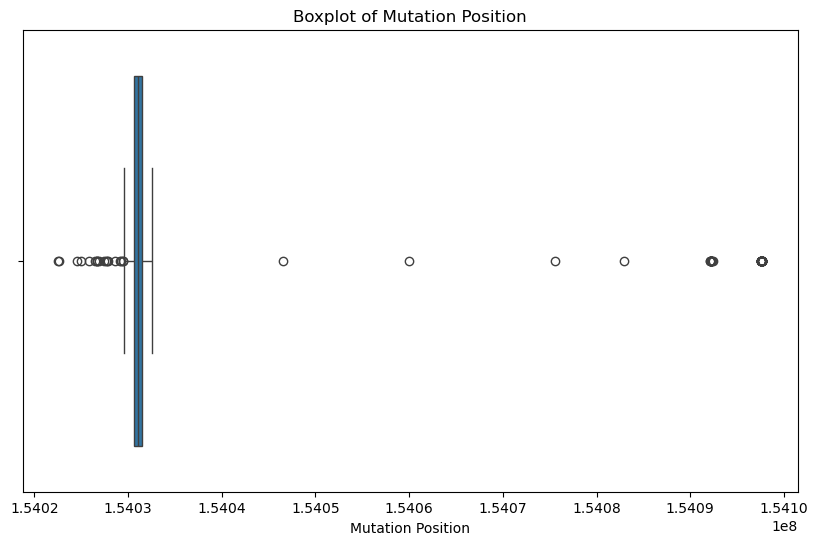

Number of outliers in Sequence Length: 0
Empty DataFrame
Columns: [Sequence_Length, Deleted_Sequence, Inserted_Sequence]
Index: []


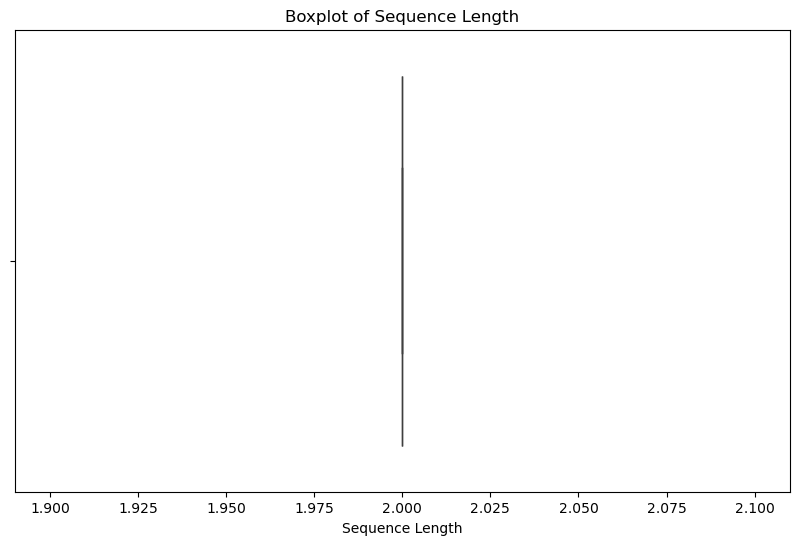

In [14]:


# Function to detect outliers using IQR (Interquartile Range)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify outliers in Mutation Position
position_outliers = detect_outliers_iqr(df_new, 'position')

print(f"Number of outliers in Mutation Position: {len(position_outliers)}")
print(position_outliers[['position', 'Deleted_Sequence', 'Inserted_Sequence']])

# Visualize the outliers in Mutation Position
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new, x='position')
plt.title('Boxplot of Mutation Position')
plt.xlabel('Mutation Position')
plt.show()

# Identify outliers in Sequence Length
df_new['Sequence_Length'] = df_new['Deleted_Sequence'].str.len() + df_new['Inserted_Sequence'].str.len()
sequence_outliers = detect_outliers_iqr(df_new, 'Sequence_Length')

print(f"Number of outliers in Sequence Length: {len(sequence_outliers)}")
print(sequence_outliers[['Sequence_Length', 'Deleted_Sequence', 'Inserted_Sequence']])

# Visualize the outliers in Sequence Length
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new, x='Sequence_Length')
plt.title('Boxplot of Sequence Length')
plt.xlabel('Sequence Length')
plt.show()


In [15]:


# Select numerical columns for summary statistics
numerical_features = ['position', 'Sequence_Length']

# Generate summary statistics for numerical features
summary_stats = df_new[numerical_features].describe(percentiles=[0.25, 0.5, 0.75])

print("Summary Statistics for Numerical Features:")
print(summary_stats)

# Additional statistics for position feature
position_mean = df_new['position'].mean()
position_median = df_new['position'].median()
position_std = df_new['position'].std()

print(f"\nPosition Feature:")
print(f"Mean: {position_mean:.2f}")
print(f"Median: {position_median:.2f}")
print(f"Standard Deviation: {position_std:.2f}")

# Additional statistics for sequence length
sequence_mean = df_new['Sequence_Length'].mean()
sequence_median = df_new['Sequence_Length'].median()
sequence_std = df_new['Sequence_Length'].std()

print(f"\nSequence Length Feature:")
print(f"Mean: {sequence_mean:.2f}")
print(f"Median: {sequence_median:.2f}")
print(f"Standard Deviation: {sequence_std:.2f}")


Summary Statistics for Numerical Features:
           position  Sequence_Length
count  8.020000e+02            802.0
mean   1.540344e+08              2.0
std    1.437677e+04              0.0
min    1.540225e+08              2.0
25%    1.540307e+08              2.0
50%    1.540311e+08              2.0
75%    1.540314e+08              2.0
max    1.540977e+08              2.0

Position Feature:
Mean: 154034448.92
Median: 154031079.50
Standard Deviation: 14376.77

Sequence Length Feature:
Mean: 2.00
Median: 2.00
Standard Deviation: 0.00
